# Clean

In [3]:
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

file_path = 'mass16.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()[38:]

data = []
for line in lines:

    if not re.match(r"^\s*\d+", line):
        continue

    columns = [
        line[0:4].strip(),   # N-Z
        line[4:7].strip(),   # N
        line[7:10].strip(),  # Z
        line[10:14].strip(), # A
        line[14:17].strip(), # EL
        line[17:22].strip(), # O
        line[22:39].strip(), # MASS EXCESS (keV)
        line[39:51].strip(), # BINDING ENERGY/A (keV)
        line[51:61].strip(), # BETA-DECAY ENERGY (keV)
        line[61:82].strip(), # ATOMIC MASS (micro-u)
    ]
    
    data.append(columns)

df = pd.DataFrame(data, columns=["N-Z", "N", "Z", "A", "EL", "O", "MASS EXCESS (keV)", "BINDING ENERGY/A (keV)", "BETA-DECAY ENERGY (keV)", "ATOMIC MASS (micro-u)"])

output_path = 'processed_mass16_data.csv'
df.to_csv(output_path, index=False)

output_path


'processed_mass16_data.csv'

In [4]:
file_path = 'processed_mass16_data.csv'
df = pd.read_csv(file_path)

df['EL'] = df['O'].str.extract(r'([A-Za-z]+)')

df['O'] = df['MASS EXCESS (keV)'].str.extract(r'(-\w+)')

df['MASS EXCESS (keV)'] = pd.to_numeric(df['MASS EXCESS (keV)'], errors='coerce')

modified_file_path = 'processed_mass16_data.csv'
df.to_csv(modified_file_path, index=False)

print(modified_file_path)


processed_mass16_data.csv


In [5]:
import pandas as pd

file_path = 'rct1-16.txt'

with open(file_path, 'r') as file:
    for _ in range(50):  
        print(file.readline())


1    a0p4g1fu                                 A T O M I C   M A S S   A D J U S T M E N T

0                                                     DATE  1 Mar 2017 TIME 17:45

0        *********************                               A=   0 TO 295

         * file : rct1-16.txt*

         *********************



   This is one file out of a series of 3 files published in:

       "The Ame2016 atomic mass evaluation (I)"   by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu

           Chinese Physics C41 030002, March 2017.

       "The Ame2016 atomic mass evaluation (II)"  by M.Wang, G.Audi, F.G.Kondev, W.J.Huang, S.Naimi and X.Xu

           Chinese Physics C41 030003, March 2017.

                       for files : mass16.txt  : atomic masses

                                   rct1-16.txt : react and sep energies,  part 1

                                   rct2-16.txt : react and sep energies,  part 2

   A fourth file  is the "Rounded" version of the atomic mass table (t

In [6]:
with open('rct1-16.txt', 'r') as file:
    lines = file.readlines()
    for i, line in enumerate(lines[:100]):  #
        print(f"Line {i+1}: {line}")


Line 1: 1    a0p4g1fu                                 A T O M I C   M A S S   A D J U S T M E N T

Line 2: 0                                                     DATE  1 Mar 2017 TIME 17:45

Line 3: 0        *********************                               A=   0 TO 295

Line 4:          * file : rct1-16.txt*

Line 5:          *********************

Line 6: 

Line 7:    This is one file out of a series of 3 files published in:

Line 8:        "The Ame2016 atomic mass evaluation (I)"   by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu

Line 9:            Chinese Physics C41 030002, March 2017.

Line 10:        "The Ame2016 atomic mass evaluation (II)"  by M.Wang, G.Audi, F.G.Kondev, W.J.Huang, S.Naimi and X.Xu

Line 11:            Chinese Physics C41 030003, March 2017.

Line 12:                        for files : mass16.txt  : atomic masses

Line 13:                                    rct1-16.txt : react and sep energies,  part 1

Line 14:                                    

In [7]:
import pandas as pd
import re

file_path = 'rct2-16.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()[39:]  

data = []
for line in lines:
    if not re.match(r"^\s*\d+", line):
        continue

    columns = re.findall(r"(\d+|[A-Za-z]+|\*|\d+\.\d+\s+\d+\.\d+)", line)

    if len(columns) > 2 and re.match(r"^[A-Za-z]+$", columns[1]):
        row = {
            "A": columns[0],
            "elt": columns[1],
            "Z": columns[2],
            "S(n)": columns[3] if columns[3] == '*' else ' '.join(columns[3:5]) if len(columns) > 4 else columns[3],
            "S(p)": columns[5] if len(columns) > 6 and columns[5] == '*' else ' '.join(columns[5:7]) if len(columns) > 6 else columns[5] if len(columns) > 5 else '',
            "Q(4B-)": columns[7] if len(columns) > 8 and columns[7] == '*' else ' '.join(columns[7:9]) if len(columns) > 8 else columns[7] if len(columns) > 7 else '',
            "Q(d,a)": columns[9] if len(columns) > 10 and columns[9] == '*' else ' '.join(columns[9:11]) if len(columns) > 10 else columns[9] if len(columns) > 9 else '',
            "Q(p,a)": columns[11] if len(columns) > 12 and columns[11] == '*' else ' '.join(columns[11:13]) if len(columns) > 12 else columns[11] if len(columns) > 11 else '',
            "Q(n,a)": columns[13] if len(columns) > 14 and columns[13] == '*' else ' '.join(columns[13:15]) if len(columns) > 14 else columns[13] if len(columns) > 13 else ''
        }
        data.append(row)

df = pd.DataFrame(data, columns=["A", "elt", "Z", "S(n)", "S(p)", "Q(4B-)", "Q(d,a)", "Q(p,a)", "Q(n,a)"])

output_path = 'process_rct2-16.csv'
df.to_csv(output_path, index=False)

print(f"Data has been processed and saved to: {output_path}")


Data has been processed and saved to: process_rct2-16.csv


In [8]:
import pandas as pd
import re

file_path = 'rct1-16.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()[39:]  

data = []
for line in lines:
    if not re.match(r"^\s*\d+", line):
        continue

    columns = re.findall(r"(\d+|[A-Za-z]+|\*|\d+\.\d+\s+\d+\.\d+)", line)

    if len(columns) > 2 and re.match(r"^[A-Za-z]+$", columns[1]):
        row = {
            "A": columns[0],
            "elt": columns[1],
            "Z": columns[2],
            "S(n)": columns[3] if columns[3] == '*' else ' '.join(columns[3:5]) if len(columns) > 4 else columns[3],
            "S(p)": columns[5] if len(columns) > 6 and columns[5] == '*' else ' '.join(columns[5:7]) if len(columns) > 6 else columns[5] if len(columns) > 5 else '',
            "Q(4B-)": columns[7] if len(columns) > 8 and columns[7] == '*' else ' '.join(columns[7:9]) if len(columns) > 8 else columns[7] if len(columns) > 7 else '',
            "Q(d,a)": columns[9] if len(columns) > 10 and columns[9] == '*' else ' '.join(columns[9:11]) if len(columns) > 10 else columns[9] if len(columns) > 9 else '',
            "Q(p,a)": columns[11] if len(columns) > 12 and columns[11] == '*' else ' '.join(columns[11:13]) if len(columns) > 12 else columns[11] if len(columns) > 11 else '',
            "Q(n,a)": columns[13] if len(columns) > 14 and columns[13] == '*' else ' '.join(columns[13:15]) if len(columns) > 14 else columns[13] if len(columns) > 13 else ''
        }
        data.append(row)

df = pd.DataFrame(data, columns=["A", "elt", "Z", "S(n)", "S(p)", "Q(4B-)", "Q(d,a)", "Q(p,a)", "Q(n,a)"])

output_path = 'process_rct1-16.csv'
df.to_csv(output_path, index=False)

print(f"Data has been processed and saved to: {output_path}")


Data has been processed and saved to: process_rct1-16.csv


In [9]:
import pandas as pd
import re

mass_df = pd.read_csv('processed_mass16_data.csv')
rct1_df = pd.read_csv('process_rct1-16.csv')
rct2_df = pd.read_csv('process_rct2-16.csv')

def clean_column(column):
    cleaned_column = []
    for value in column:
        if isinstance(value, str):
            match = re.match(r"[-+]?\d*\.?\d+|\d+", value)
            if match:
                cleaned_column.append(float(match.group()))
            else:
                cleaned_column.append(None)
        else:
            cleaned_column.append(value)
    return cleaned_column

mass_df['MASS EXCESS (keV)'] = clean_column(mass_df['MASS EXCESS (keV)'])
mass_df['BINDING ENERGY/A (keV)'] = clean_column(mass_df['BINDING ENERGY/A (keV)'])
mass_df['BETA-DECAY ENERGY (keV)'] = clean_column(mass_df['BETA-DECAY ENERGY (keV)'])
mass_df['ATOMIC MASS (micro-u)'] = clean_column(mass_df['ATOMIC MASS (micro-u)'])

# Drop rows with any NaN values
mass_df = mass_df.dropna()

# Clean and drop NaN rows in rct1_df
rct1_df['S(n)'] = clean_column(rct1_df['S(n)'])
rct1_df['S(p)'] = clean_column(rct1_df['S(p)'])
rct1_df['Q(4B-)'] = clean_column(rct1_df['Q(4B-)'])
rct1_df['Q(d,a)'] = clean_column(rct1_df['Q(d,a)'])
rct1_df['Q(p,a)'] = clean_column(rct1_df['Q(p,a)'])
rct1_df['Q(n,a)'] = clean_column(rct1_df['Q(n,a)'])

rct1_df = rct1_df.dropna()

# Clean and drop NaN rows in rct2_df
rct2_df['S(n)'] = clean_column(rct2_df['S(n)'])
rct2_df['S(p)'] = clean_column(rct2_df['S(p)'])
rct2_df['Q(4B-)'] = clean_column(rct2_df['Q(4B-)'])
rct2_df['Q(d,a)'] = clean_column(rct2_df['Q(d,a)'])
rct2_df['Q(p,a)'] = clean_column(rct2_df['Q(p,a)'])
rct2_df['Q(n,a)'] = clean_column(rct2_df['Q(n,a)'])

rct2_df = rct2_df.dropna()

mass_df.to_csv('mass16_cleaned_processed.csv', index=False)
rct1_df.to_csv('process_rct1_16_processed.csv', index=False)
rct2_df.to_csv('process_rct2_16_processed.csv', index=False)

mass_df.head(), rct1_df.head(), rct2_df.head()

(     N-Z    N  Z   A  EL       O  MASS EXCESS (keV)  BINDING ENERGY/A (keV)  \
 1988  32  1.0  0  68  Er  -62991         -62991.171                   1.168   
 2004  31  1.0  0  69  Tm  -61275         -61275.212                   0.812   
 2019  34  1.0  2  68  Er  -60108         -60108.681                   1.546   
 2020  32  1.0  1  69  Tm  -59795         -59795.853                   0.801   
 2021  30  1.0  0  70  Yb  -60763         -60763.919                   0.010   
 
       BETA-DECAY ENERGY (keV)  ATOMIC MASS (micro-u)  
 1988                   8129.6                    1.0  
 2004                   8114.4                   73.0  
 2019                   8111.9                   59.0  
 2020                   8105.5                   17.0  
 2021                   8106.6                    9.0  ,
     A elt  Z     S(n)   S(p)   Q(4B-)   Q(d,a)  Q(p,a)   Q(n,a)
 9   6  Li  3  27378.0  212.0  25112.0    100.0  1473.0      0.0
 13  7  Li  3  12914.0   50.0  32563.0     89.0  24

# EDA analysis

In [10]:
import pandas as pd

file1 = 'mass16_cleaned_processed.csv'
file2 = 'process_rct1_16_processed.csv'
file3 = 'process_rct2_16_processed.csv'

mass16_df = pd.read_csv(file1)
process_rct1_df = pd.read_csv(file2)
process_rct2_df = pd.read_csv(file3)

mass16_df.head(), process_rct1_df.head(), process_rct2_df.head()

(   N-Z    N  Z   A  EL      O  MASS EXCESS (keV)  BINDING ENERGY/A (keV)  \
 0   32  1.0  0  68  Er -62991         -62991.171                   1.168   
 1   31  1.0  0  69  Tm -61275         -61275.212                   0.812   
 2   34  1.0  2  68  Er -60108         -60108.681                   1.546   
 3   32  1.0  1  69  Tm -59795         -59795.853                   0.801   
 4   30  1.0  0  70  Yb -60763         -60763.919                   0.010   
 
    BETA-DECAY ENERGY (keV)  ATOMIC MASS (micro-u)  
 0                   8129.6                    1.0  
 1                   8114.4                   73.0  
 2                   8111.9                   59.0  
 3                   8105.5                   17.0  
 4                   8106.6                    9.0  ,
    A elt  Z     S(n)   S(p)   Q(4B-)   Q(d,a)  Q(p,a)   Q(n,a)
 0  6  Li  3  27378.0  212.0  25112.0    100.0  1473.0      0.0
 1  7  Li  3  12914.0   50.0  32563.0     89.0  2467.0      0.0
 2  8  Li  3   9283.0    

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatter plot of N (Neutron Number) vs. MASS EXCESS (keV)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mass16_df['N'], y=mass16_df['MASS EXCESS (keV)'])
plt.title('Neutron Number (N) vs. Mass Excess (keV)')
plt.xlabel('Neutron Number (N)')
plt.ylabel('Mass Excess (keV)')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

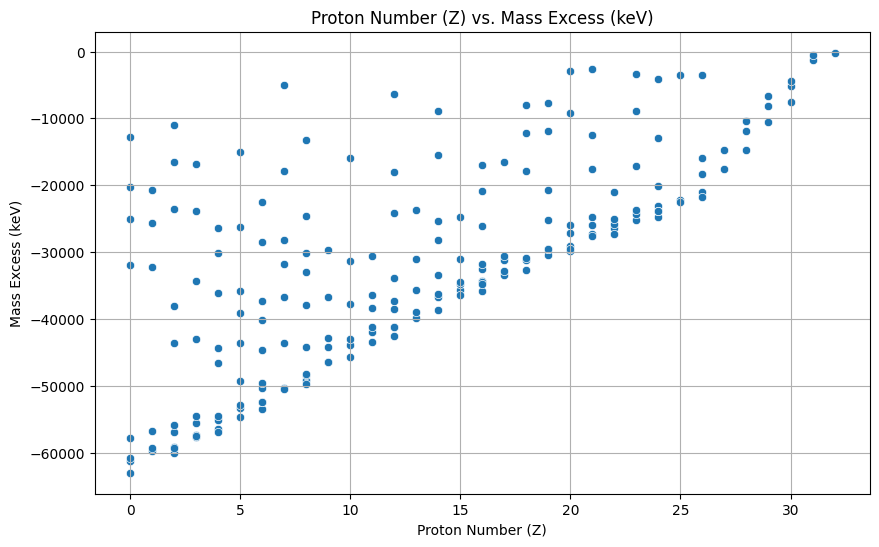

In [ ]:
# Scatter plot of Z (Proton Number) vs. MASS EXCESS (keV)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mass16_df['Z'], y=mass16_df['MASS EXCESS (keV)'])
plt.title('Proton Number (Z) vs. Mass Excess (keV)')
plt.xlabel('Proton Number (Z)')
plt.ylabel('Mass Excess (keV)')
plt.grid(True)
plt.show()



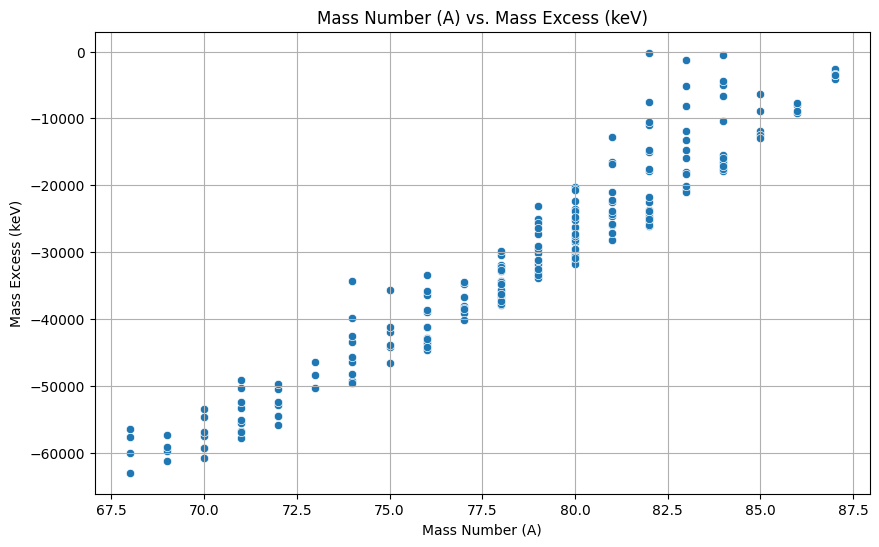

In [ ]:
# Scatter plot of A (Mass Number) vs. MASS EXCESS (keV)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mass16_df['A'], y=mass16_df['MASS EXCESS (keV)'])
plt.title('Mass Number (A) vs. Mass Excess (keV)')
plt.xlabel('Mass Number (A)')
plt.ylabel('Mass Excess (keV)')
plt.grid(True)
plt.show()


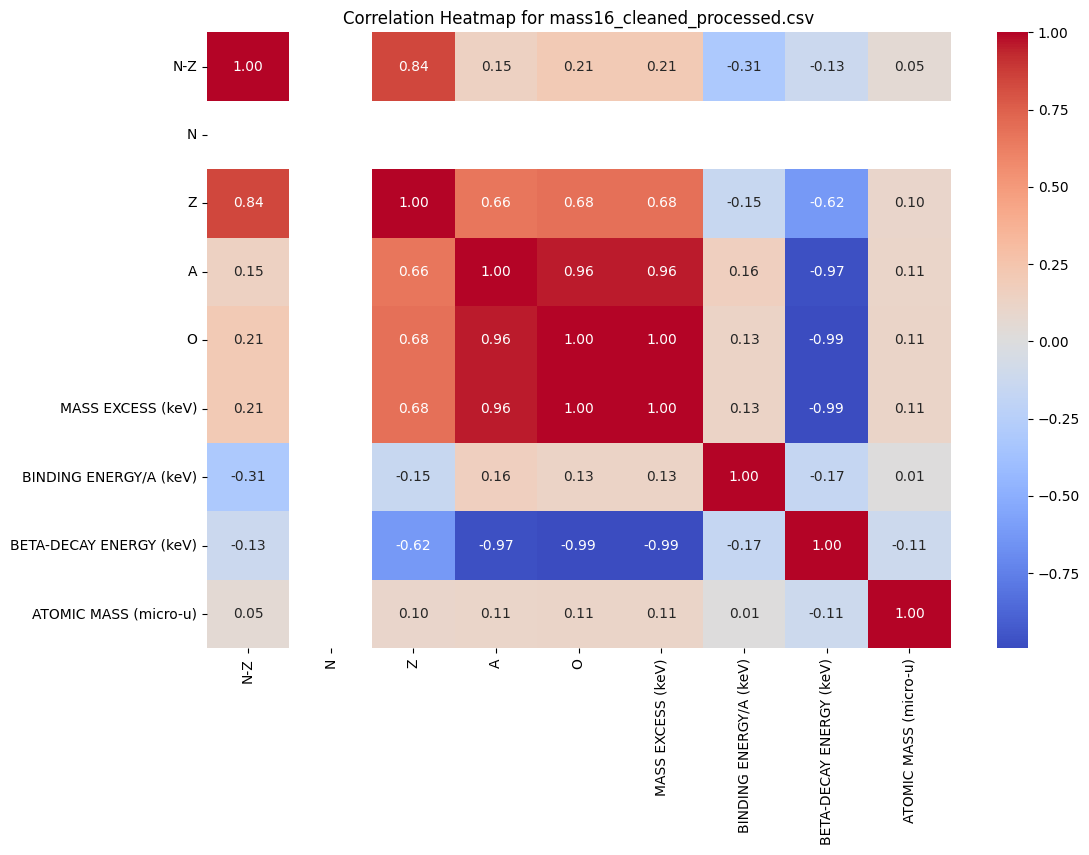

In [ ]:
numeric_data = mass16_df.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for mass16_cleaned_processed.csv')
plt.show()


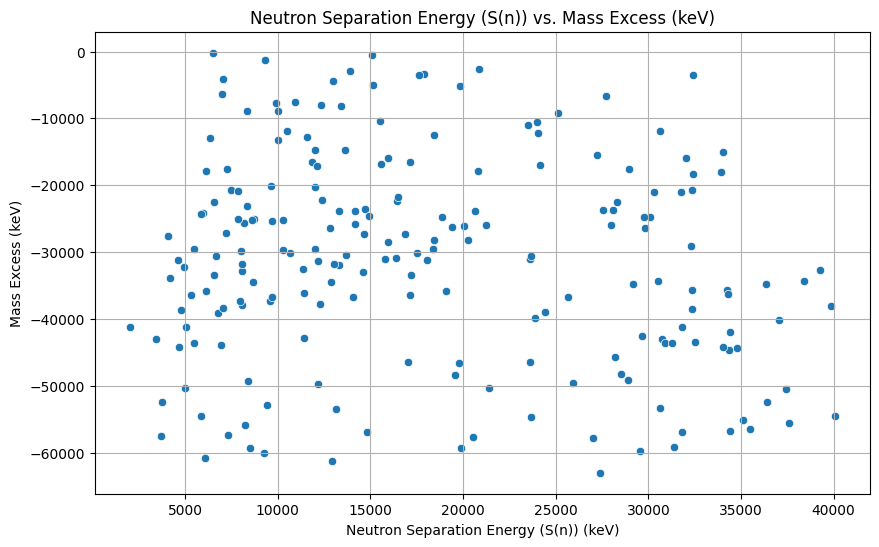

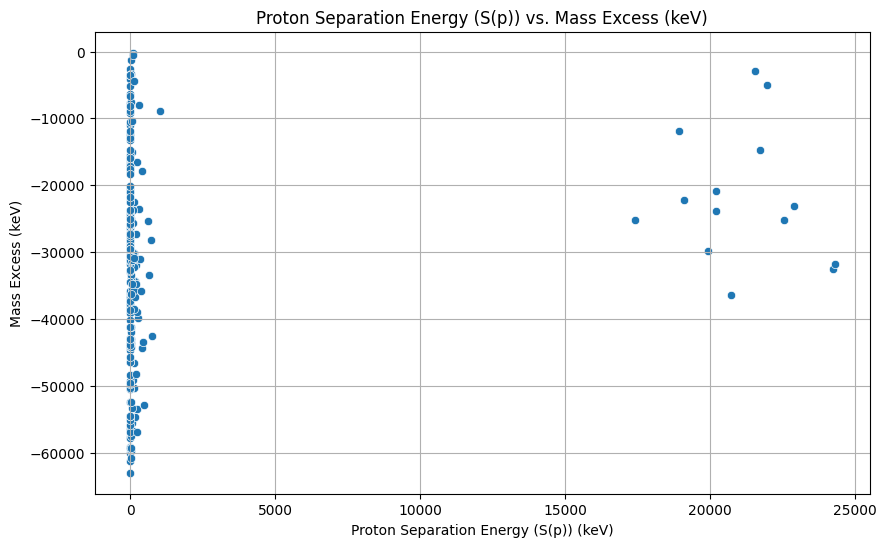

In [ ]:
# Scatter plot of S(n) vs. Mass Excess in process_rct1_16_processed.csv
plt.figure(figsize=(10, 6))
sns.scatterplot(x=process_rct1_df['S(n)'], y=mass16_df['MASS EXCESS (keV)'][:len(process_rct1_df)])
plt.title('Neutron Separation Energy (S(n)) vs. Mass Excess (keV)')
plt.xlabel('Neutron Separation Energy (S(n)) (keV)')
plt.ylabel('Mass Excess (keV)')
plt.grid(True)
plt.show()

# Scatter plot of S(p) vs. Mass Excess in process_rct2_16_processed.csv
plt.figure(figsize=(10, 6))
sns.scatterplot(x=process_rct2_df['S(p)'], y=mass16_df['MASS EXCESS (keV)'][:len(process_rct2_df)])
plt.title('Proton Separation Energy (S(p)) vs. Mass Excess (keV)')
plt.xlabel('Proton Separation Energy (S(p)) (keV)')
plt.ylabel('Mass Excess (keV)')
plt.grid(True)
plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


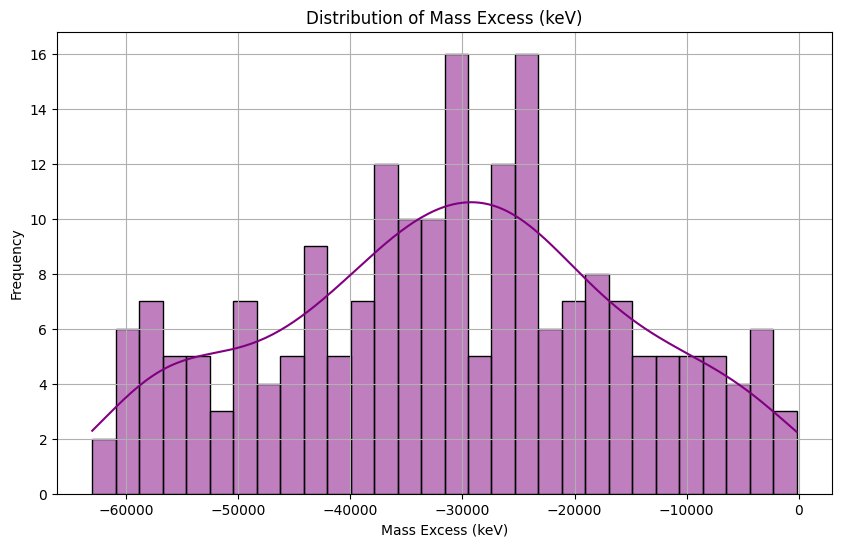

In [ ]:
# Additional visualizations for EDA

# Distribution of Mass Excess
plt.figure(figsize=(10, 6))
sns.histplot(mass16_df['MASS EXCESS (keV)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Mass Excess (keV)')
plt.xlabel('Mass Excess (keV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



<Figure size 800x800 with 0 Axes>

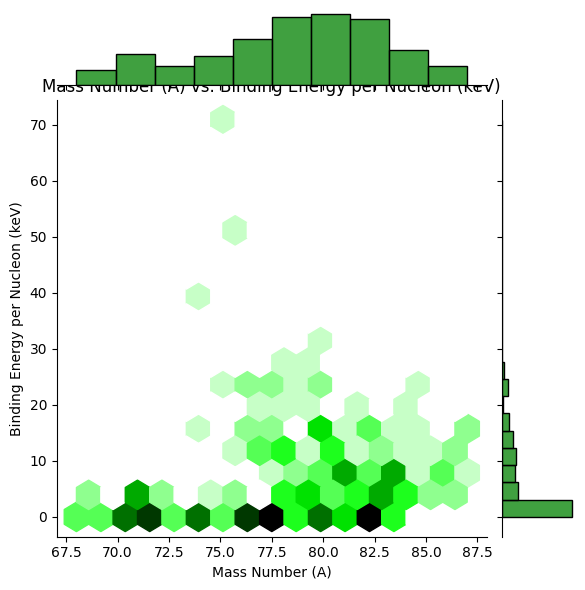

In [ ]:
# Joint plot for Mass Number (A) and Binding Energy per Nucleon
plt.figure(figsize=(8, 8))
sns.jointplot(x='A', y='BINDING ENERGY/A (keV)', data=mass16_df, kind='hex', color='green')
plt.title('Mass Number (A) vs. Binding Energy per Nucleon (keV)')
plt.xlabel('Mass Number (A)')
plt.ylabel('Binding Energy per Nucleon (keV)')
plt.show()



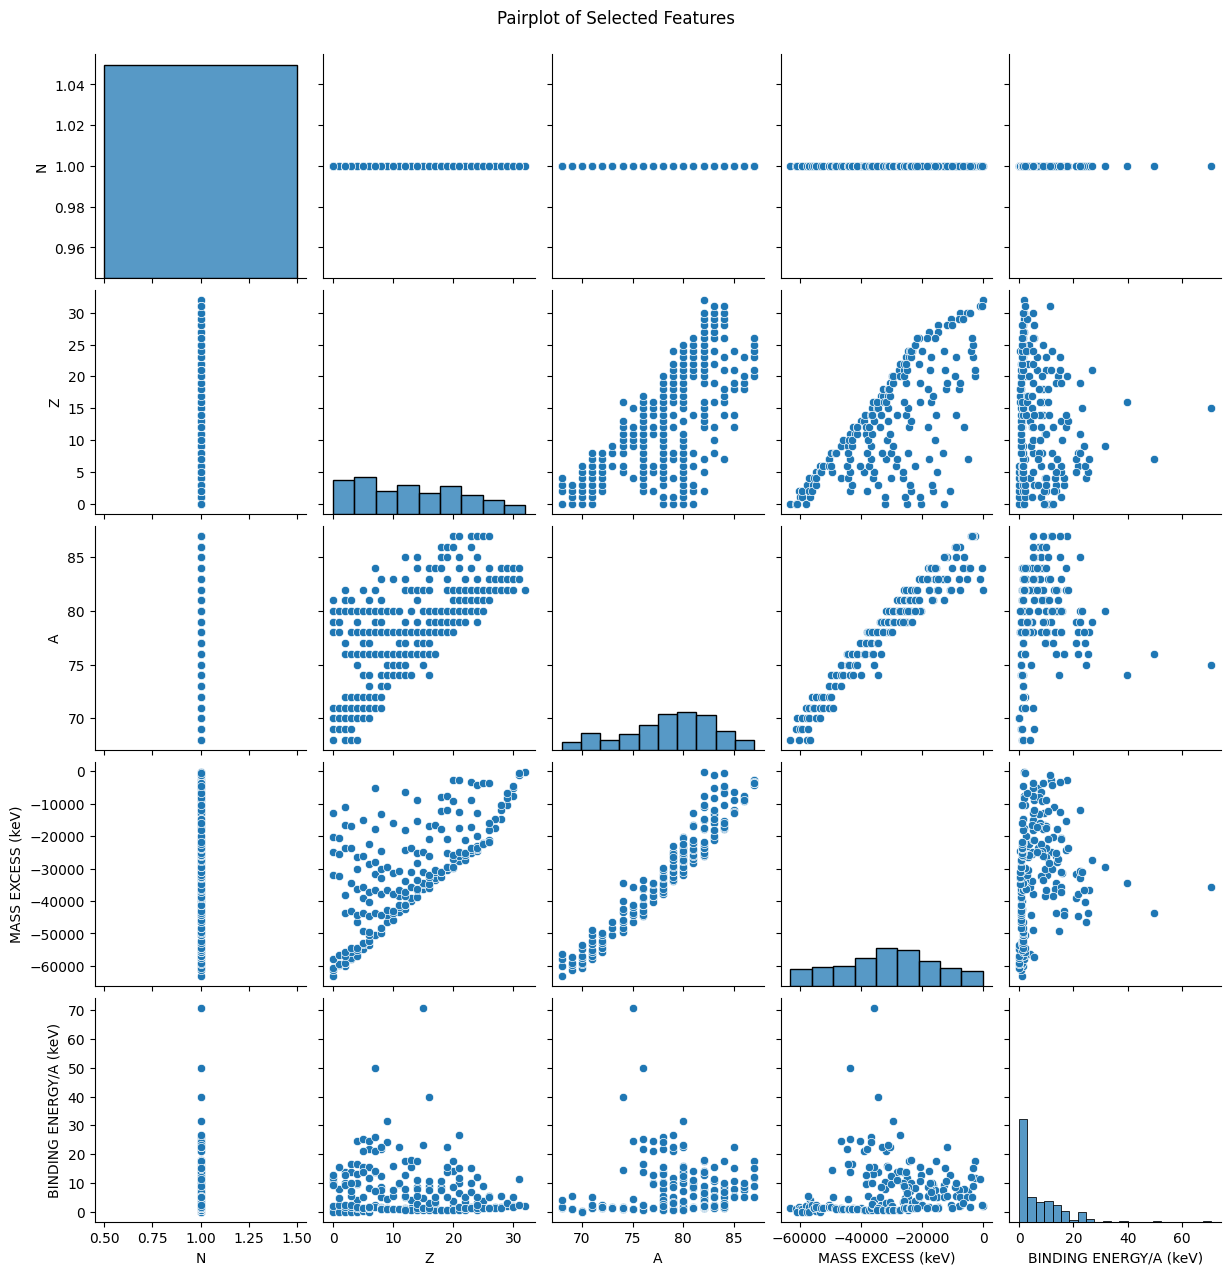

In [ ]:
# Pairplot for selected features in mass16_df
selected_columns = ['N', 'Z', 'A', 'MASS EXCESS (keV)', 'BINDING ENERGY/A (keV)']
sns.pairplot(mass16_df[selected_columns])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()



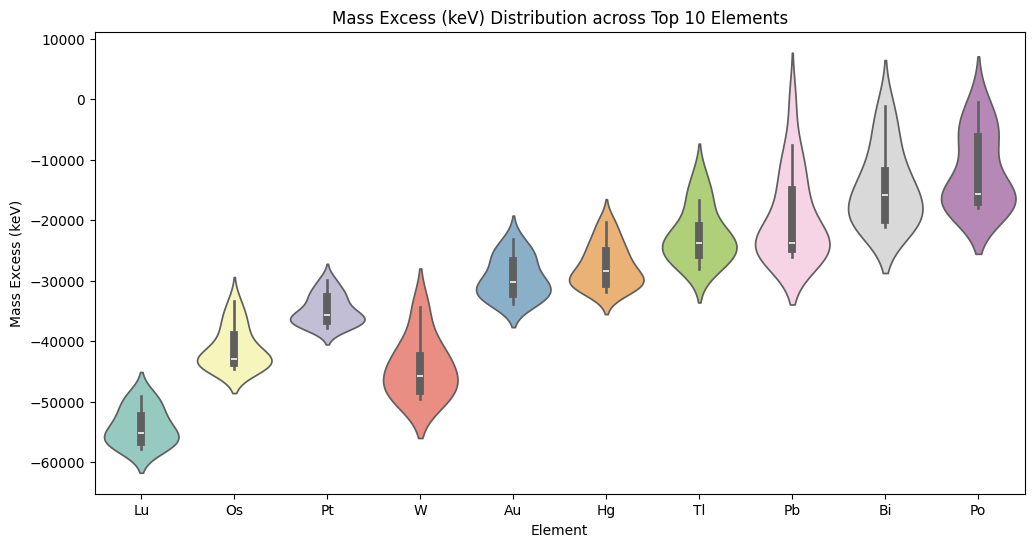

In [ ]:
# Violin plot for Mass Excess across different Elements (limited to top 10 elements for clarity)
top_elements = mass16_df['EL'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.violinplot(x='EL', y='MASS EXCESS (keV)', data=mass16_df[mass16_df['EL'].isin(top_elements)], palette='Set3')
plt.title('Mass Excess (keV) Distribution across Top 10 Elements')
plt.xlabel('Element')
plt.ylabel('Mass Excess (keV)')
plt.show()



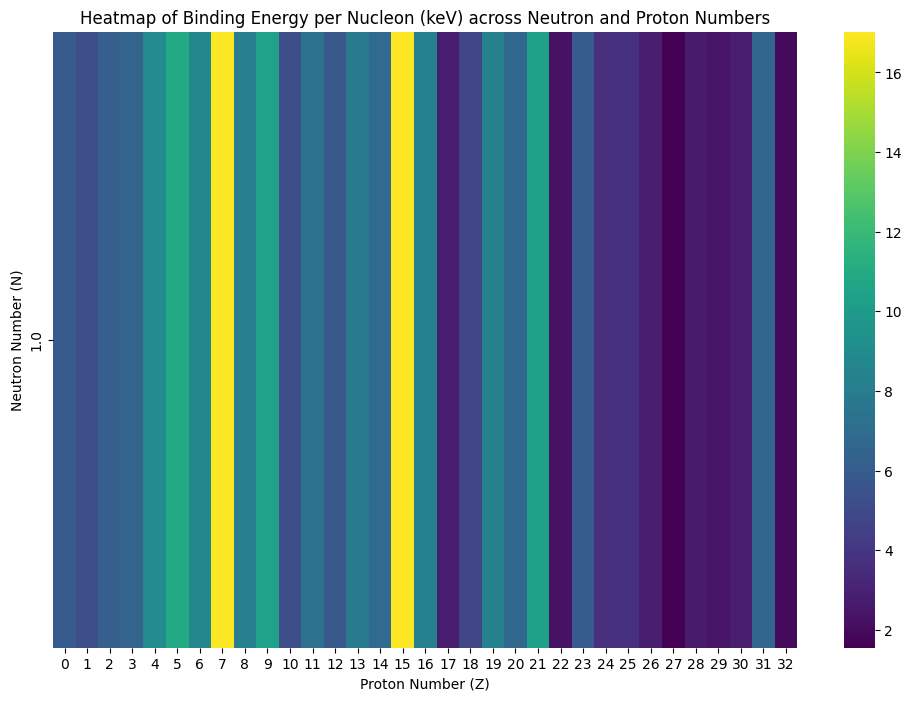

In [ ]:
# Heatmap of Binding Energy per Nucleon (keV) across Neutron (N) and Proton (Z) numbers
pivot_table = mass16_df.pivot_table(index='N', columns='Z', values='BINDING ENERGY/A (keV)', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=False)
plt.title('Heatmap of Binding Energy per Nucleon (keV) across Neutron and Proton Numbers')
plt.xlabel('Proton Number (Z)')
plt.ylabel('Neutron Number (N)')
plt.show()


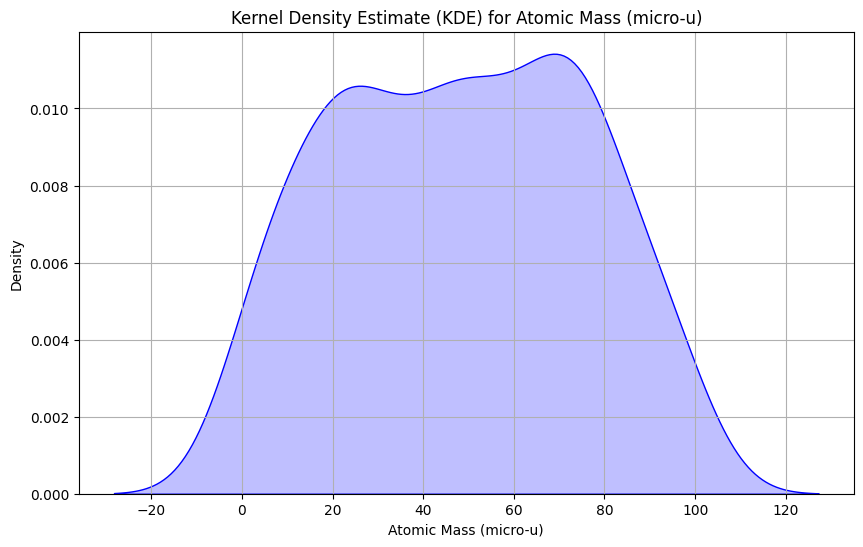

In [ ]:

# KDE plot for Atomic Mass
plt.figure(figsize=(10, 6))
sns.kdeplot(mass16_df['ATOMIC MASS (micro-u)'], shade=True, color='blue')
plt.title('Kernel Density Estimate (KDE) for Atomic Mass (micro-u)')
plt.xlabel('Atomic Mass (micro-u)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


# Building model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

file1 = 'mass16_cleaned_processed.csv'
file2 = 'process_rct1_16_processed.csv'
file3 = 'process_rct2_16_processed.csv'

mass16_df = pd.read_csv(file1)
process_rct1_df = pd.read_csv(file2)
process_rct2_df = pd.read_csv(file3)

# Feature selection 
features = mass16_df[['N', 'Z', 'A']].join(
    process_rct1_df[['S(n)', 'S(p)']], how='inner').join(
    process_rct2_df[['Q(4B-)', 'Q(d,a)']], how='inner')
target = mass16_df['MASS EXCESS (keV)']

# Dropping any rows with missing values
data = pd.concat([features, target], axis=1).dropna()

X = data.drop(columns=['MASS EXCESS (keV)'])
y = data['MASS EXCESS (keV)']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [ ]:
# Initialize models
linear_model = LinearRegression()
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict with models
linear_preds = linear_model.predict(X_test)
mlp_preds = mlp_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_preds)
mlp_mse = mean_squared_error(y_test, mlp_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

linear_mae = mean_absolute_error(y_test, linear_preds)
mlp_mae = mean_absolute_error(y_test, mlp_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)

print(f"Linear Regression MSE: {linear_mse}, MAE: {linear_mae}")
print(f"MLP MSE: {mlp_mse}, MAE: {mlp_mae}")
print(f"XGBoost MSE: {xgb_mse}, MAE: {xgb_mae}")


Linear Regression MSE: 25592094.610272985, MAE: 3878.237427726941
MLP MSE: 72513418.16681756, MAE: 7104.0490632644405
XGBoost MSE: 3760266.1135671297, MAE: 1378.8298973013075


# Weizsäcker

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file1 = 'mass16_cleaned_processed.csv'
file2 = 'process_rct1_16_processed.csv'
file3 = 'process_rct2_16_processed.csv'

mass16_df = pd.read_csv(file1)
process_rct1_df = pd.read_csv(file2)
process_rct2_df = pd.read_csv(file3)

# Feature selection
features = mass16_df[['N', 'Z', 'A']].join(
    process_rct1_df[['S(n)', 'S(p)']], how='inner').join(
    process_rct2_df[['Q(4B-)', 'Q(d,a)']], how='inner')
target = mass16_df['MASS EXCESS (keV)']

data = pd.concat([features, target], axis=1).dropna()

X = data.drop(columns=['MASS EXCESS (keV)'])
y = data['MASS EXCESS (keV)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


a_v = 15.75  
a_s = 17.8   
a_c = 0.711 
a_a = 23.7   

def weizsaecker_mass_excess(A, Z):
    """Calculate the binding energy using Weizsäcker formula and then the mass excess."""
    N = A - Z  # Number of neutrons
    volume_term = a_v * A
    surface_term = a_s * A**(2/3)
    coulomb_term = a_c * Z * (Z - 1) / A**(1/3)
    asymmetry_term = a_a * (A - 2*Z)**2 / A

    if A % 2 == 1:
        delta = 0
    elif Z % 2 == 0:
        delta = 33 / A**0.5  
    else:
        delta = -33 / A**0.5  

    B = volume_term - surface_term - coulomb_term - asymmetry_term + delta

    # Convert binding energy to mass excess
    mass_excess = 931.5 * A - B  # 931.5 MeV/c^2 per nucleon

    return mass_excess

A_test = data.loc[y_test.index]['A']
Z_test = data.loc[y_test.index]['Z']

weizsaecker_preds = np.array([weizsaecker_mass_excess(A, Z) for A, Z in zip(A_test, Z_test)])

weizsaecker_mse = np.mean((y_test.values - weizsaecker_preds) ** 2)
weizsaecker_mae = np.mean(np.abs(y_test.values - weizsaecker_preds))

print(f"Weizsäcker Formula MSE: {weizsaecker_mse}, MAE: {weizsaecker_mae}")

Weizsäcker Formula MSE: 10378939271.762453, MAE: 101236.86775410848


# Importance Analysis

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, booster='gbtree')

xgb_model.fit(X_train, y_train)

feature_importances = xgb_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances from XGBoost Model:")
print(importance_df)

Feature Importances from XGBoost Model:
  Feature  Importance
2       A    0.964179
1       Z    0.030058
4    S(p)    0.002302
6  Q(d,a)    0.001834
3    S(n)    0.001050
5  Q(4B-)    0.000577
0       N    0.000000


# Comparison of MSE and MAE Across Different Models

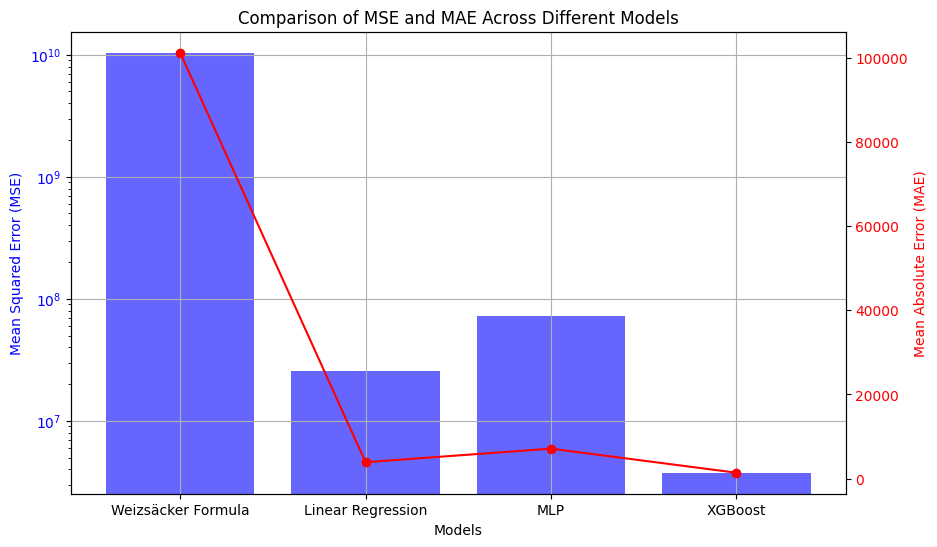

In [2]:
import matplotlib.pyplot as plt
# Define the data
models = ['Weizsäcker Formula', 'Linear Regression', 'MLP', 'XGBoost']
mse_values = [10378939271.762453, 25592094.610272985, 72513418.16681756, 3760266.1135671297]
mae_values = [101236.86775410848, 3878.237427726941, 7104.0490632644405, 1378.8298973013075]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE values
ax1.bar(models, mse_values, color='b', alpha=0.6, label='MSE')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean Squared Error (MSE)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_yscale('log')

# Create a second y-axis to plot MAE values
ax2 = ax1.twinx()
ax2.plot(models, mae_values, color='r', marker='o', label='MAE')
ax2.set_ylabel('Mean Absolute Error (MAE)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and grid
plt.title('Comparison of MSE and MAE Across Different Models')
ax1.grid(True)

# Show plot
plt.show()

#### Data Processing
I extracted relevant features such as neutron number (N), proton number (Z), mass number (A), proton separation energy (S_p), and neutron separation energy (S_n) from three datasets. These physical quantities were used as features, with mass excess as the target variable. I applied normalization to the features to enhance the performance of the machine learning models.I also split the dataset in an 8:2 ratio (training, testing)

#### Model Selection and Training
For the model selection, I used the Weizsäcker formula as a traditional physical model to calculate the mass excess, serving as a baseline. Additionally, I trained three machine learning models:
- **Linear Regression**
- **Multilayer Perceptron (MLP)**
- **XGBoost**

#### Model Evaluation
I evaluated the models using Mean Squared Error (MSE) and Mean Absolute Error (MAE). The results were as follows:
- **Linear Regression**: MSE = 25,592,094.61, MAE = 3,878.24
- **Multilayer Perceptron (MLP)**: MSE = 72,513,418.17, MAE = 7,104.05
- **XGBoost**: MSE = 3,760,266.11, MAE = 1,378.83
- **Weizsäcker Formula**: MSE = 10,378,939,271.76, MAE = 101,236.87

From these results, it is clear that the XGBoost model performed the best, showing the lowest error rates.

#### Result Interpretation and Feature Importance Analysis
The Weizsäcker formula, while theoretically sound, showed much higher error rates, indicating that in this context, it is less accurate compared to the machine learning models. 

The feature importance analysis from the XGBoost model revealed that the **mass number (A)** was the most significant predictor of mass excess, with an importance score of 0.964179. This was followed by **proton number (Z)** with a score of 0.030058. Other features such as proton separation energy (S_p) and neutron separation energy (S_n) had relatively lower importance.

### Final Thoughts
The XGBoost model demonstrated superior performance in predicting mass excess, significantly outperforming the traditional Weizsäcker formula. The analysis highlighted that mass number (A) is the most critical feature for predicting mass excess, emphasizing its influence on nuclear mass. While traditional physical models have their merits, this study shows that data-driven machine learning models can provide higher accuracy in certain scenarios.